## Simulation of Consumption Growth

Prepared for the Shenzhen Winter Camp

#### John Stachurski

In [18]:
import numpy as np
from numpy.random import randn
from numba import jit
import matplotlib.pyplot as plt

Our task is to simulate consumption growth in the model of Schorfheide, Song and Yaron.  See the slides for details of the model.

In [19]:
@jit(nopython=True)
def simulate_ssy(μ_c=0.0016,
                 ρ=0.987,
                 ϕ_z=0.215,
                 σ_bar=0.0032,
                 ϕ_c=1.0,
                 ρ_hz=0.992,
                 σ_hz=np.sqrt(0.0039),
                 ρ_hc=0.991,
                 σ_hc=np.sqrt(0.0096),
                 ts_length=100000):  

        # Initial conditions
        z, h_z, h_c = 0.0, 0.0, 0.0

        # Allocate memory  
        c_growth = np.zeros(ts_length)

        # Simulate all stochastic processes 
        for t in range(ts_length-1):
            # Simplify names
            σ_z = ϕ_z * σ_bar * np.exp(h_z)
            σ_c = ϕ_c * σ_bar * np.exp(h_c)
            
            # Evaluate consumption and dividends
            c_growth[t] = μ_c + z + σ_c * randn()

            # Update states
            z = ρ * z + np.sqrt(1 - ρ**2) * σ_z * randn()
            h_z = ρ_hz * h_z + σ_hz * randn()
            h_c = ρ_hc * h_c + σ_hc * randn()

        return c_growth[2:]

Let's simulate one consumption path of length 1000.

In [24]:
n = 1000
c_growth = simulate_ssy(ts_length=n)
mean_c_growth = c_growth.mean()

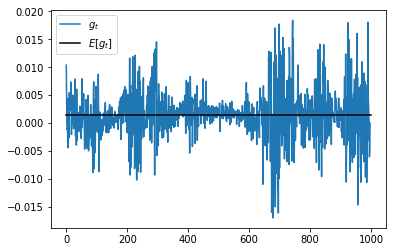

In [23]:
fig, ax = plt.subplots()
ax.plot(c_growth, label='$g_t$')
ax.plot(mean_c_growth * np.ones(n), 
        'k-', 
        label='$E[g_t]$')
ax.legend()
plt.show()